In [83]:
import sklearn
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
r=dir(datasets)
print(r)
iris = datasets.load_iris()
print("features ",iris.feature_names)
x_train,x_test,y_train,y_test=train_test_split(iris.data,iris.target,test_size=0.25)

cv_scores=[]
neighbors=list(np.arange(2,50,2))
print(neighbors)
for n in neighbors:
    knn=KNeighborsClassifier(n_neighbors=n,algorithm='brute')
    cross_val=cross_val_score(knn,x_train,y_train,cv=5,scoring='accuracy')
    cv_scores.append(cross_val.mean())
error=[1-x for x in cv_scores]
optimal_n=neighbors[error.index(min(error))]
knn_optimal=KNeighborsClassifier(n_neighbors=optimal_n,algorithm='brute')
knn_optimal.fit(x_train,y_train)
pred=knn_optimal.predict(x_test)
acc=accuracy_score(y_test,pred)
print("The accuracy for optimal k={} using brute is {}".format(optimal_n,acc))
print("classification report using brute force")
print(classification_report(y_test,pred))

['__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_base', '_california_housing', '_covtype', '_kddcup99', '_lfw', '_olivetti_faces', '_openml', '_rcv1', '_samples_generator', '_species_distributions', '_svmlight_format_fast', '_svmlight_format_io', '_twenty_newsgroups', 'clear_data_home', 'dump_svmlight_file', 'fetch_20newsgroups', 'fetch_20newsgroups_vectorized', 'fetch_california_housing', 'fetch_covtype', 'fetch_kddcup99', 'fetch_lfw_pairs', 'fetch_lfw_people', 'fetch_olivetti_faces', 'fetch_openml', 'fetch_rcv1', 'fetch_species_distributions', 'get_data_home', 'load_boston', 'load_breast_cancer', 'load_diabetes', 'load_digits', 'load_files', 'load_iris', 'load_linnerud', 'load_sample_image', 'load_sample_images', 'load_svmlight_file', 'load_svmlight_files', 'load_wine', 'make_biclusters', 'make_blobs', 'make_checkerboard', 'make_circles', 'make_classification', 'make_friedman1', 'make_friedman2', 'make

[[13  0  0]
 [ 0 14  0]
 [ 0  0 11]]


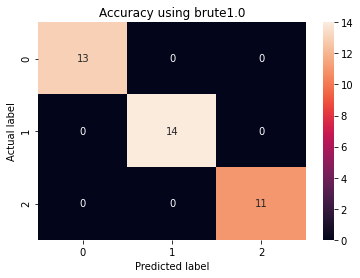

In [80]:
cm=confusion_matrix(y_test,pred)
print(cm)
cn_df=pd.DataFrame(cm,
                  index=['1','2','3'],
                  columns=['4','5','6'])
sns.heatmap(cm,annot=True)
plt.title('Accuracy using brute{}'.format(accuracy_score(y_test,pred)))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show()

100.0


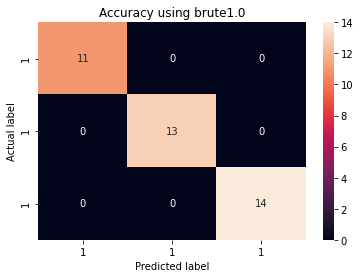

In [84]:
from sklearn.svm import SVC
s1=SVC(kernel='rbf').fit(x_train,y_train)
s1_pred=s1.predict(x_test)
acc=accuracy_score(y_test,s1_pred)*100
print(acc)
cn=confusion_matrix(y_test,s1_pred)
cn_df=pd.DataFrame(cn,
                  index=['1','1','1'],
                  columns=['1','1','1'])
sns.heatmap(cn_df,annot=True)
plt.title('Accuracy using brute{}'.format(accuracy_score(y_test,s1_pred)))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show()
